# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [1]:
library(dplyr)
library(factoextra)

df_pilot_2025 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/02_pilot_2025.rds")


Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Le chargement a n'ecessit'e le package : ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot_2025_clust <- df_pilot_2025 %>% select(all_of(variables_clust)) %>% select(-id) %>%
tidyr::drop_na()

In [3]:
# Scaling des variables
df_scaled <- scale(df_pilot_2025_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

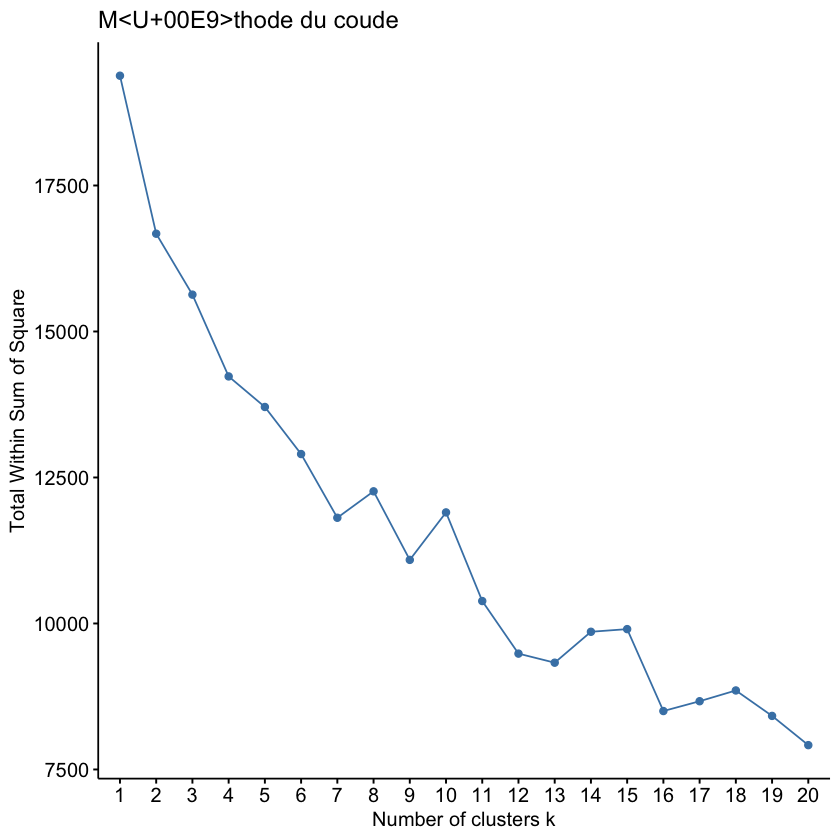

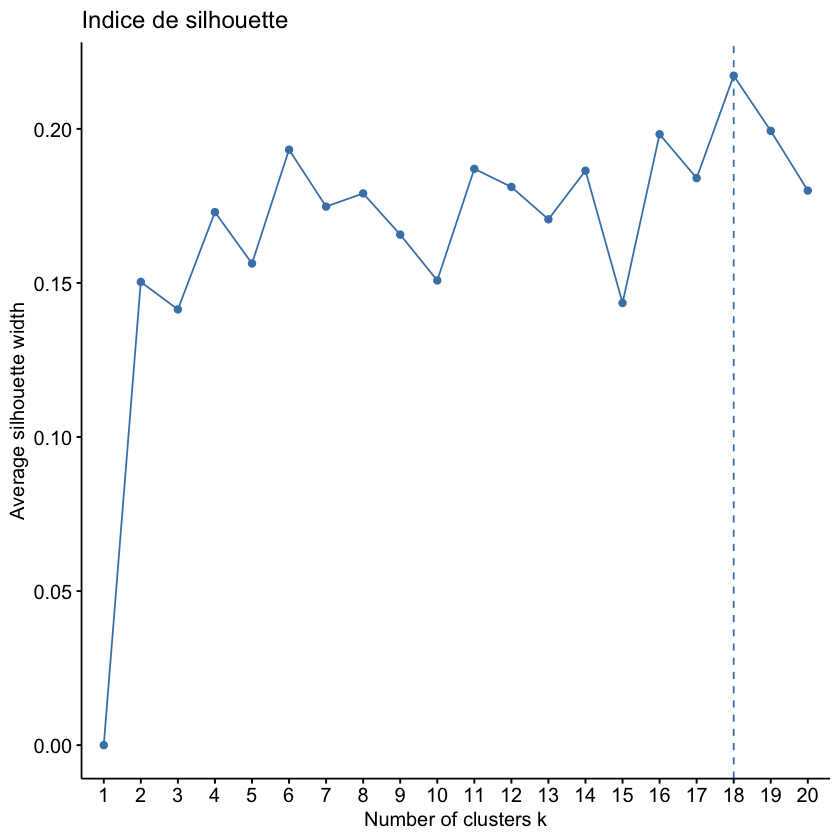

In [4]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss", k.max = 20) +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette", k.max = 20) +
  ggtitle("Indice de silhouette")

In [5]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 10

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [6]:
kmeans_result

K-means clustering with 10 clusters of sizes 79, 122, 124, 37, 37, 147, 103, 88, 142, 142

Cluster means:
     ses_urban ses_age_3Cat ses_languageFrench ses_educBHS ses_educUniv
1  -0.02992939  -0.14097340          1.2516786  0.04233743  -0.17129760
2  -0.22850003   0.52819207          1.4563140 -0.09425089  -0.09457748
3   0.07199247  -0.02379921         -0.6186862 -0.23944624   0.23127680
4  -0.58809718   0.17113483         -0.6538753  0.21258990  -0.33651586
5  -0.08318968  -0.18433313         -0.2411172  0.14633401   0.15091230
6   0.36294552   0.04363241         -0.6241920 -0.09930857   0.18554438
7  -0.02763351  -0.07734763         -0.6538753  0.07879160  -0.13460387
8  -0.25595475   0.12302915          1.3542998  0.37521799  -0.27189470
9  -0.01642179  -0.14928700         -0.6077826  0.08801017   0.01322719
10  0.14437427  -0.26716946         -0.2851337 -0.10189227   0.08378604
   ses_incomeLow ses_incomeHigh ses_immigrant ses_regionAtlantic
1   -0.033367598    0.118194965   -0.

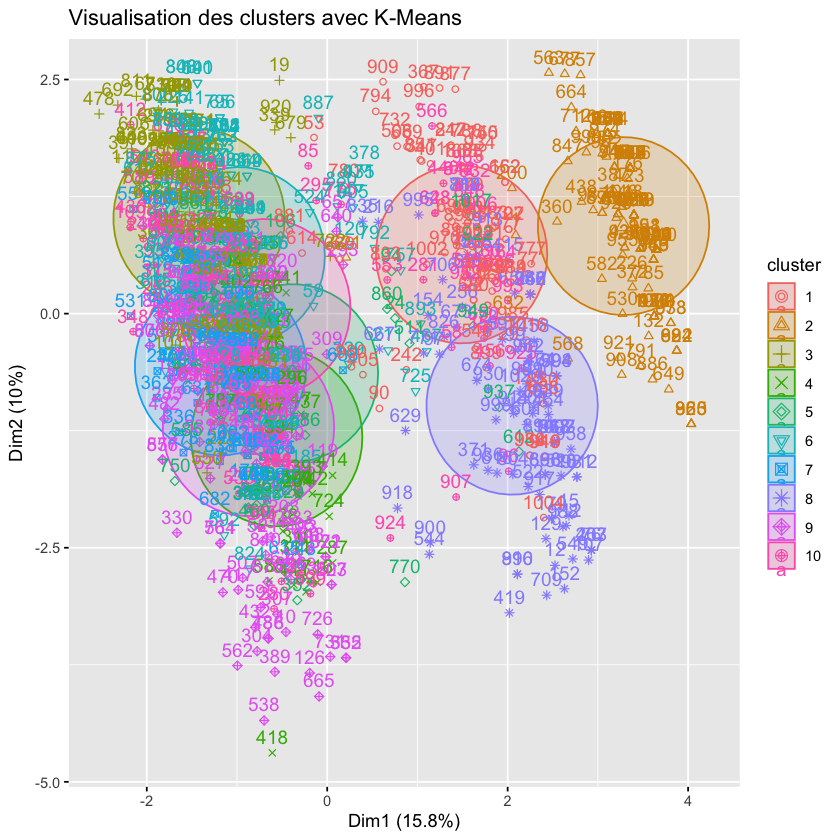

In [7]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [14]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot_2025$cluster <- as.factor(kmeans_result$cluster)

df_pilot_2025 <- df_pilot_2025 %>%
  mutate(cluster_name = recode(cluster,
                               "1" = "Maxime",
                               "2" = "Michel",
                               "3" = "David",
                               "4" = "Robert",
                               "5" = "Emily",
                               "6" = "Jennifer",
                               "7" = "John",
                               "8" = "Julie",
                               "9" = "Arjun",
                               "10" = "Zoe"))


# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot_2025$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot_2025[[paste0("cluster_", i)]] <- ifelse(df_pilot_2025$cluster == i, 1, 0)
}

table(df_pilot_2025$cluster_name)
table(df_pilot_2025$cluster)


  Maxime   Michel    David   Robert    Emily Jennifer     John    Julie 
      79      122      124       37       37      147      103       88 
   Arjun      Zoe 
     142      142 


  1   2   3   4   5   6   7   8   9  10 
 79 122 124  37  37 147 103  88 142 142 

In [17]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_kmeans.rds")
saveRDS(df_pilot_2025, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_2025.rds")